In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = r"C:\Users\crist\Downloads\amz_uk_price_prediction_dataset.csv.zip"
df = pd.read_csv(url)

crosstab = pd.crosstab(df['category'], df['isBestSeller'])

crosstab['BestSeller_Proportion'] = crosstab[True] / (crosstab[False] + crosstab[True])

sorted_crosstab = crosstab.sort_values(by='BestSeller_Proportion', ascending=False)
display(sorted_crosstab)

isBestSeller,False,True,BestSeller_Proportion
category,,,
Grocery,9008,556,0.058135
Smart Home Security & Lighting,98,6,0.057692
Health & Personal Care,9017,552,0.057686
Mobile Phone Accessories,248,11,0.042471
Power & Hand Tools,8353,306,0.035339
...,...,...,...
"CD, Disc & Tape Players",8798,0,0.000000
General Music-Making Accessories,259,0,0.000000
Snowboard Boots,1449,0,0.000000


In [55]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(crosstab.iloc[:, :2])

print(f"Chi-square Statistic: {chi2:.2f}")
print(f"p-value: {p:.4f}")

Chi-square Statistic: 36540.20
p-value: 0.0000


In [57]:
def cramers_v(chi2, n, min_dim):
    return np.sqrt(chi2 / (n * (min_dim - 1)))

n = df.shape[0]
min_dim = min(crosstab.shape)
cramers_v_value = cramers_v(chi2, n, min_dim)

print(f"Cramér's V: {cramers_v_value:.3f}")

Cramér's V: 0.086


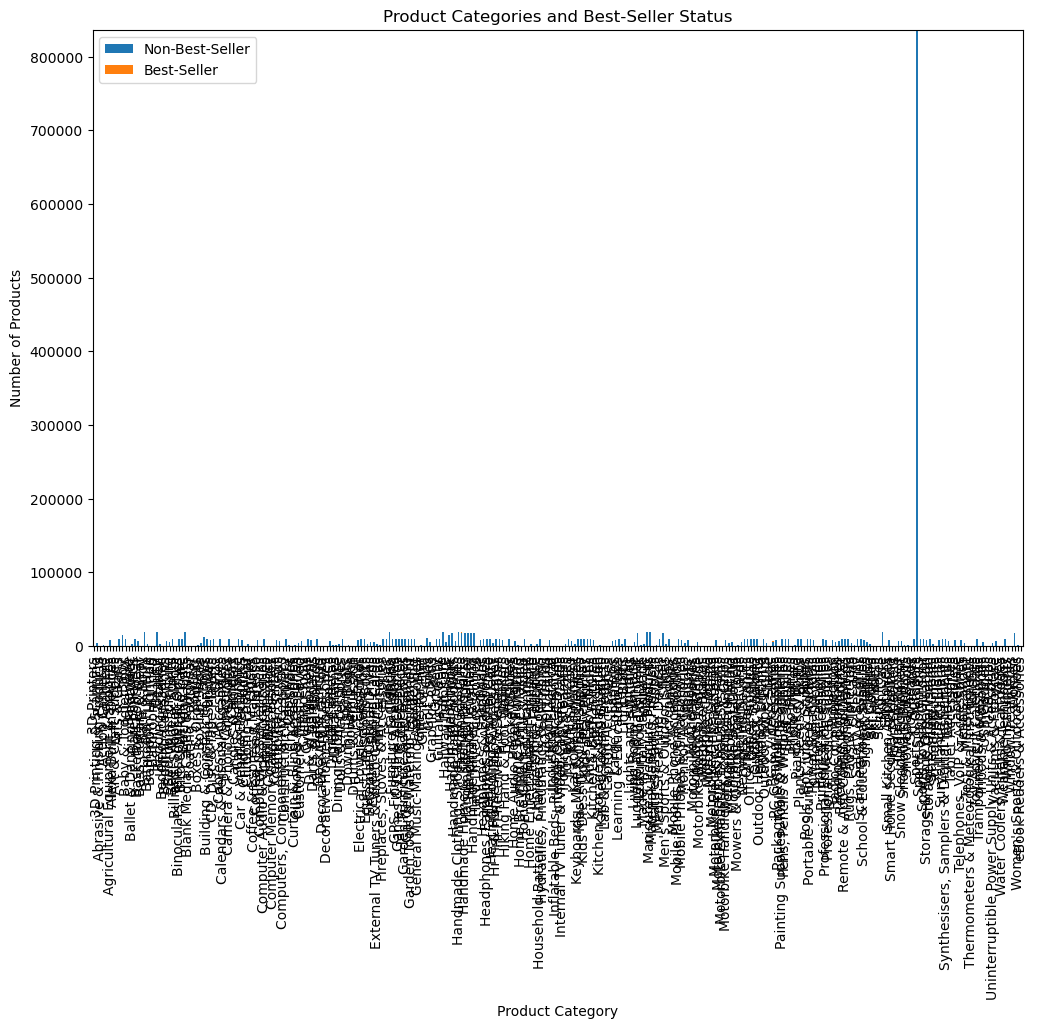

In [69]:
crosstab.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Product Categories and Best-Seller Status')
plt.xlabel('Product Category')
plt.ylabel('Number of Products')
plt.legend(['Non-Best-Seller', 'Best-Seller'])
plt.xticks(rotation=90)
plt.show()

In [71]:
#2

In [73]:
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

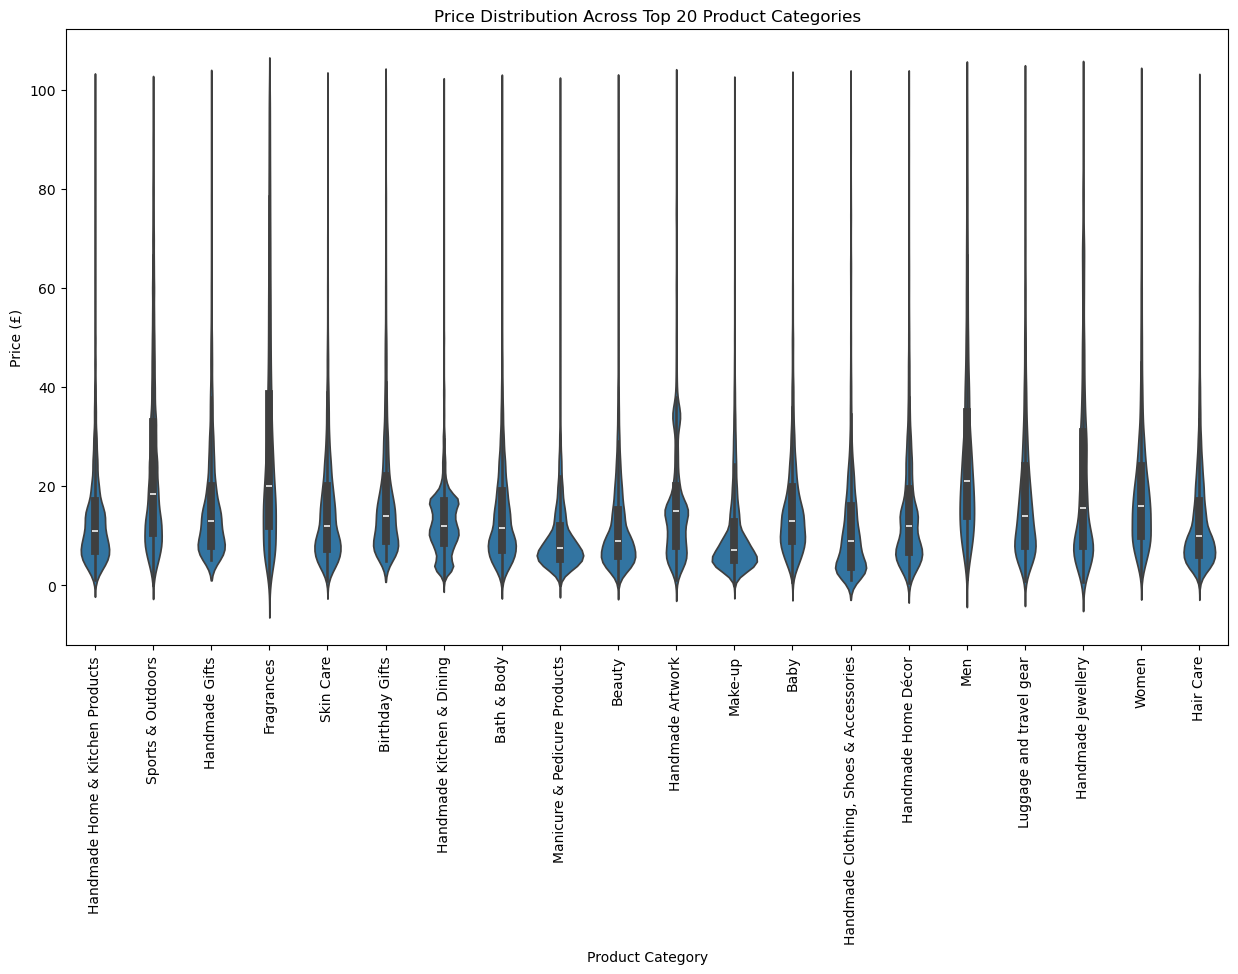

In [75]:
import seaborn as sns

top_20_categories = df_no_outliers['category'].value_counts().nlargest(20).index
filtered_df = df_no_outliers[df_no_outliers['category'].isin(top_20_categories)]

plt.figure(figsize=(15, 8))
sns.violinplot(data=filtered_df, x='category', y='price')
plt.xticks(rotation=90)
plt.title('Price Distribution Across Top 20 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Price (£)')
plt.show()

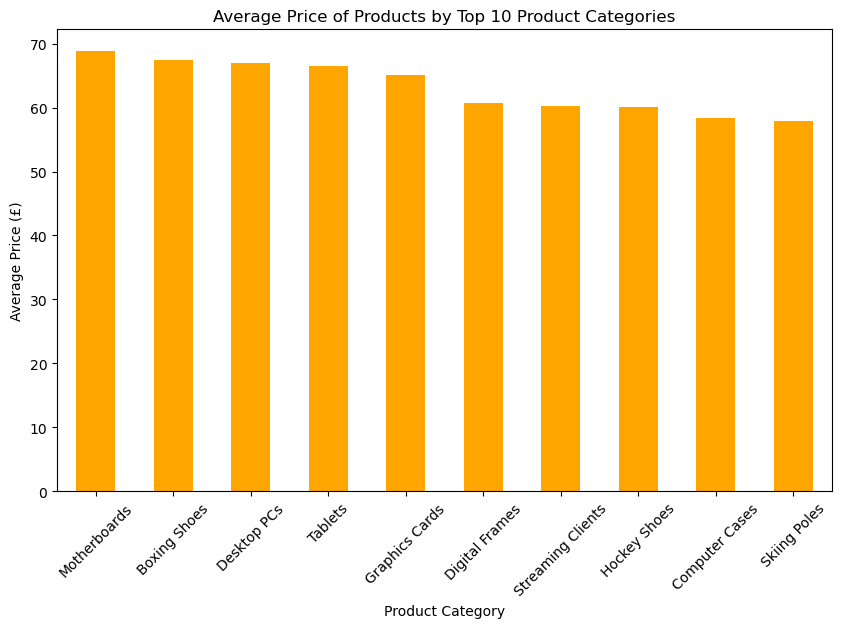

In [77]:
avg_prices = df_no_outliers.groupby('category')['price'].mean().nlargest(10)

plt.figure(figsize=(10, 6))
avg_prices.plot(kind='bar', color='orange')
plt.title('Average Price of Products by Top 10 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Average Price (£)')
plt.xticks(rotation=45)
plt.show()

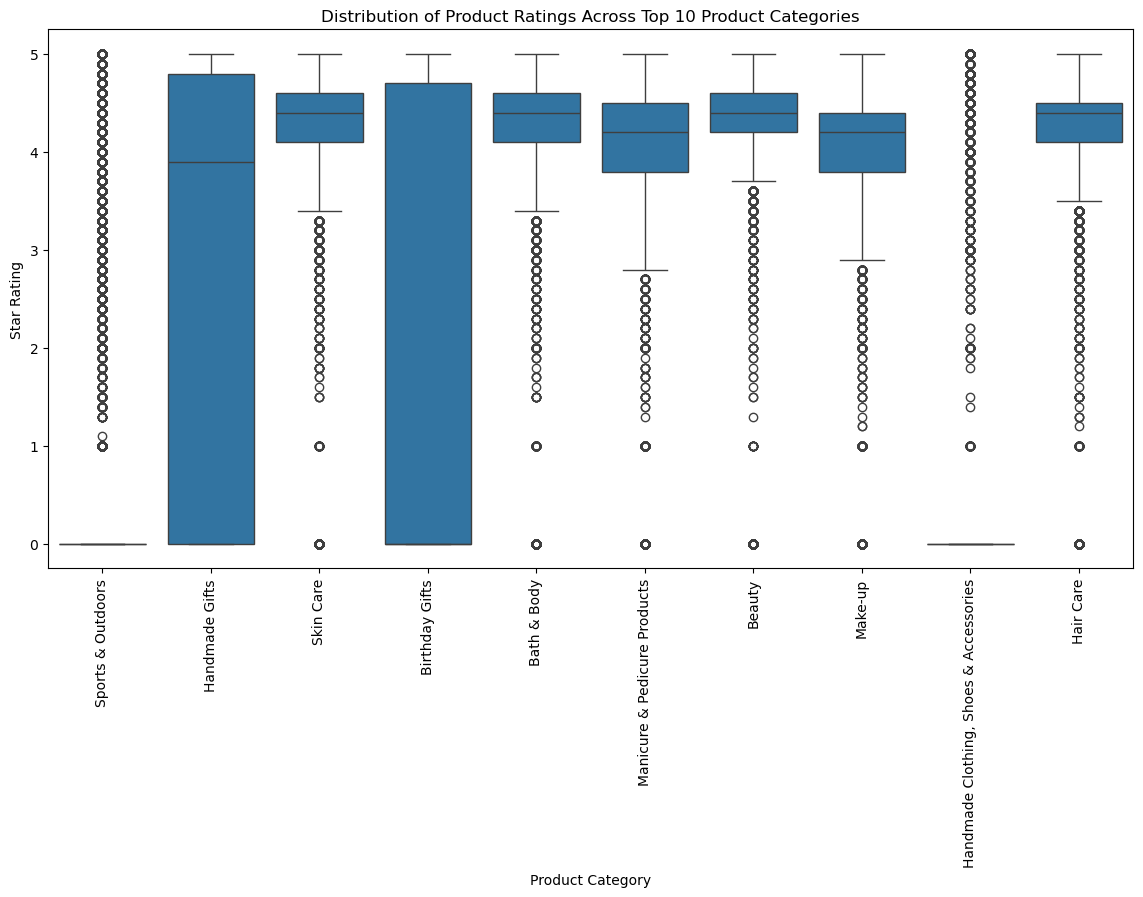

In [83]:
top_10_categories = df_no_outliers['category'].value_counts().nlargest(10).index
filtered_ratings_df = df_no_outliers[df_no_outliers['category'].isin(top_10_categories)]

plt.figure(figsize=(14, 7))
sns.boxplot(data=filtered_ratings_df, x='category', y='stars')
plt.xticks(rotation=90)
plt.title('Distribution of Product Ratings Across Top 10 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Star Rating')
plt.show()

In [85]:
correlation_coefficient = df_no_outliers['price'].corr(df_no_outliers['stars'])
print(f"Correlation Coefficient between Price and Stars: {correlation_coefficient:.2f}")

Correlation Coefficient between Price and Stars: -0.08


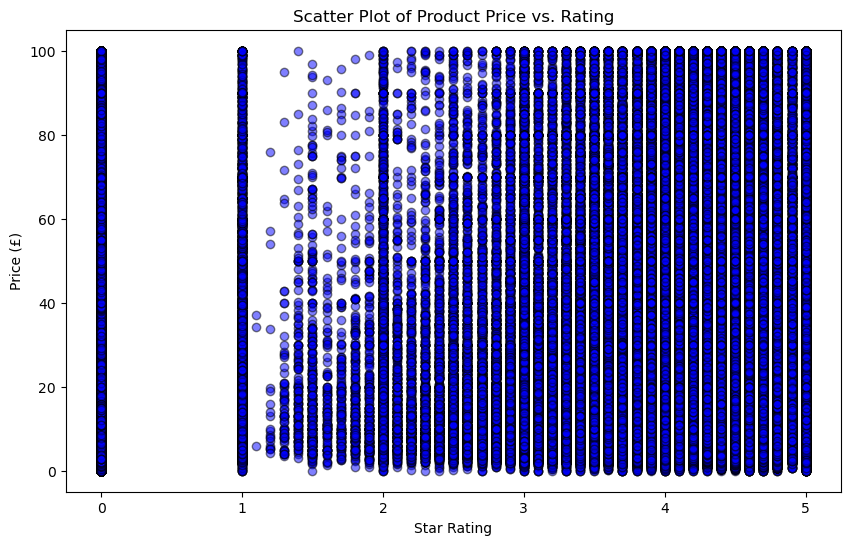

In [87]:
plt.figure(figsize=(10, 6))
plt.scatter(df_no_outliers['stars'], df_no_outliers['price'], alpha=0.5, c='blue', edgecolors='k')
plt.title('Scatter Plot of Product Price vs. Rating')
plt.xlabel('Star Rating')
plt.ylabel('Price (£)')
plt.show()

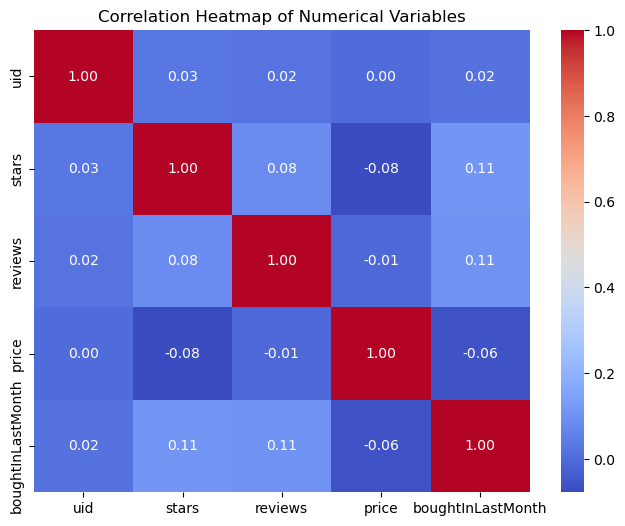

In [91]:
numeric_df = df_no_outliers.select_dtypes(include='number')

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

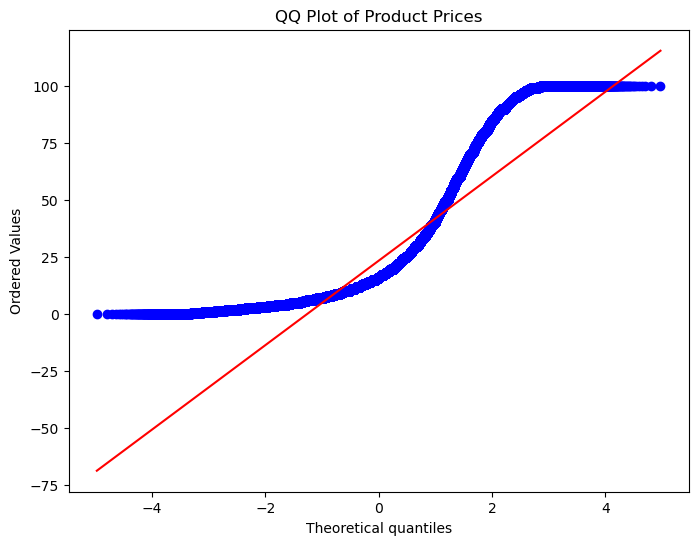

In [93]:
import scipy.stats as stats

plt.figure(figsize=(8, 6))
stats.probplot(df_no_outliers['price'], dist="norm", plot=plt)
plt.title('QQ Plot of Product Prices')
plt.show()